In [ ]:
'''
 * Copyright (c) 2018 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Penalized Canonical Correlation Analysis (PCCA)

Given two-view data matrices $X$ and $Y$, the standard Canonical Correlation Analysis (CCA) seeks to find vectors $u$ and $v$ that maximize the correlation:

$$
\max_{u,v} \quad u^T XYv
$$

subject to the constraints:

$$
\|Xu\|_2^2 \leq 1 \quad \text{and} \quad \|Yv\|_2^2 \leq 1.
$$

## Penalized Canonical Correlation Analysis

Including penalties $p_1(u) \leq c_1$ and $p_2(v) \leq c_2$ in CCA results in a penalized canonical correlation analysis:

$$
\max_{u,v} \quad u^T XYv
$$

subject to the constraints:

$$
\|Xu\|_2^2 \leq 1, \quad \|Yv\|_2^2 \leq 1, \quad p_1(u) \leq c_1, \quad p_2(v) \leq c_2.
$$

If we pre-normalize the column vectors of the data matrices \(X, Y \in \mathbb{R}^{N \times P}\) such that they become semi-orthogonal, i.e., 

$$
X^T X = I_{P \times P} \quad \text{and} \quad Y^T Y = I_{P \times P},
$$

then the penalized CCA simplifies to:

$$
\max_{u,v} \quad u^T XYv
$$

subject to:

$$
\|u\|_2^2 \leq 1, \quad \|v\|_2^2 \leq 1, \quad p_1(u) \leq c_1, \quad p_2(v) \leq c_2.
$$

This formulation is referred to as the **diagonal penalized CCA**. When the penalties are chosen as $p_1(u) = \|u\|_1$ and $p_2(v) = \|v\|_1$, the diagonal penalized CCA becomes **sparse CCA**, yielding sparse canonical variants $u$ and $v$.

### Soft Thresholding Operator

Let the soft thresholding operator be defined as:

$$
\text{soft}(a, c) = \text{sign}(a)(|a| - c)_+
$$

where $c > 0$ is a constant and

$$
x_+ = 
\begin{cases} 
x, & \text{if } x > 0, \\ 
0, & \text{if } x \leq 0. 
\end{cases}
$$

### Optimization Problem

For the optimization problem

$$
\max_{u} u^T a \quad \text{subject to} \quad \|u\|_2^2 \leq 1, \quad \|u\|_1 \leq c,
$$

the solution is given by:

$$
u = \frac{s(a, \lambda)}{\|s(a, \lambda)\|_2}
$$

where 

$$
s(a, \lambda) = [\text{soft}(a_1, \lambda), \ldots, \text{soft}(a_P, \lambda)]^T,
$$

and $\lambda = 0$ if this results in $\|u\|_1 \leq c$; otherwise, $\lambda$ is chosen to be a positive constant such that $\|u\|_1 = c$.

### Sparse CCA Problem

The penalized (sparse) CCA problem is defined as:

$$
(u, v) = \arg \max_{u,v} u^T X v
$$

subject to:

$$
\|u\|_2^2 \leq 1, \quad \|v\|_2^2 \leq 1, \quad \|u\|_1 \leq c_1, \quad \|v\|_1 \leq c_2.
$$

## Algorithm for Penalized (Sparse) CCA

### Algorithm : Penalized (Sparse) Canonical Component Analysis (CCA)

1. **Input:** The matrix $X$.
2. **Initialization:** Perform truncated SVD $X = \sum_{i=1}^{K} d_i u_i v_i^T$. Set $X_1 = X$.
3. **For $k = 1$ to $K$:**
   - Calculate $s(X_k v_k, \lambda_1)$
   - Set $u_k \leftarrow \frac{s(X_k v_k, \lambda_1)}{\|s(X_k v_k, \lambda_1)\|_2}$, where $\lambda_1 = 0$ if this results in $\|u\|_1 \leq c_1$; otherwise, $\lambda_1$ is chosen to satisfy $\|u\|_1 = c_1$.
   - Normalize: $u_k \leftarrow \frac{u_k}{\|u_k\|_2}$.
   - Calculate 4s(X^T_k u_k, \lambda_2)$
   - Set $v_k \leftarrow \frac{s(X^T_k u_k, \lambda_2)}{\|s(X^T_k u_k, \lambda_2)\|_2}$, where $\lambda_2 = 0$ if this results in $\|v\|_1 \leq c_2$; otherwise, $\lambda_2$ is chosen to satisfy $\|v\|_1 = c_2$.
   - Normalize: $v_k \leftarrow \frac{v_k}{\|v_k\|_2}$.
   - If $u_k$ and $v_k$ have converged, then:
     - $d_k = u_k^T X_k v_k$.
   - Otherwise, go to Step 4.
4. Exit if $k = K$.
5. Update $X_{k+1} \leftarrow X_k - d_k u_k v_k^T4.
6. **Output:** $u_k, v_k, k = 1, \ldots, K$.


Canonical vector u_1: [-0.10513554  0.10797977  0.07026089  0.19219852  0.03674801 -0.04481988
  0.02256879  0.00482296  0.00981961  0.05294241 -0.05062994 -0.12562725
  0.03568951 -0.00752031  0.05049375 -0.02223692  0.09338078 -0.12159035
 -0.0348122   0.14383767 -0.14152858  0.05620662 -0.05727911  0.1196993
 -0.07873801 -0.04046894 -0.01767718 -0.08270102  0.1675946  -0.10691163
 -0.07783531  0.03198737 -0.12330729  0.02047475  0.09157831  0.11266479
  0.08493576 -0.         -0.06611884 -0.         -0.01721753 -0.18591335
  0.08056909 -0.09621109 -0.01515012  0.06562041 -0.00753744 -0.27670208
 -0.11169715  0.21965609  0.08721372 -0.01997861  0.07431001 -0.03620787
 -0.15191438  0.01589111  0.27452951  0.13227009 -0.07292499  0.
 -0.06720902  0.05129138  0.02892292  0.14059967  0.20267525  0.12719581
  0.01098868 -0.14939399 -0.13445623  0.01060036  0.09764429 -0.02564432
 -0.08981785 -0.04461128  0.         -0.17146625  0.02709154 -0.01642668
 -0.06334445  0.01539154 -0.02367732 -

ValueError: x and y must be the same size

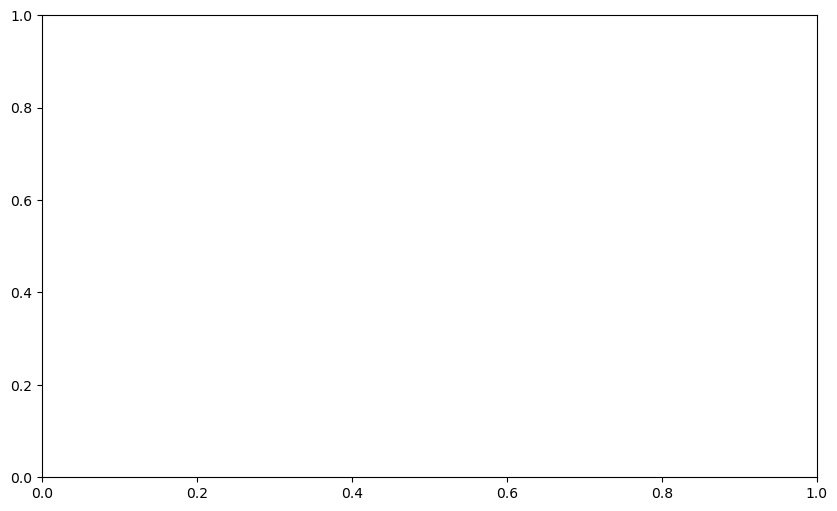

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def soft_threshold(a, c):
    """Soft thresholding operator."""
    return np.sign(a) * np.maximum(np.abs(a) - c, 0)

def pcca(X, Y, c1, c2, K, max_iter=100):
    """
    Penalized Canonical Correlation Analysis (PCCA) implementation.
    
    Parameters:
    X: np.ndarray - Data matrix X of shape (N, P)
    Y: np.ndarray - Data matrix Y of shape (N, P)
    c1: float - L1 penalty for u
    c2: float - L1 penalty for v
    K: int - Number of canonical components
    max_iter: int - Maximum iterations for convergence
    
    Returns:
    u_list: list of canonical vectors u
    v_list: list of canonical vectors v
    """
    # Initialize matrices for storing canonical vectors
    u_list = []
    v_list = []
    
    # Singular Value Decomposition
    U, S, Vt = np.linalg.svd(X, full_matrices=False)
    X_k = U[:, :K] @ np.diag(S[:K]) @ Vt[:K, :]
    
    for k in range(K):
        X_k_v = X_k @ Vt[k]
        
        # Step 3: Update u_k
        u_k = soft_threshold(X_k_v, c1)
        u_k /= np.linalg.norm(u_k)  # Normalize u_k
        
        # Step 5: Update v_k
        X_T_u_k = X.T @ u_k
        v_k = soft_threshold(X_T_u_k, c2)
        v_k /= np.linalg.norm(v_k)  # Normalize v_k
        
        # Store the results
        u_list.append(u_k)
        v_list.append(v_k)

        # Check convergence (optional)
        if k > 0 and (np.linalg.norm(u_list[k] - u_list[k-1]) < 1e-6) and (np.linalg.norm(v_list[k] - v_list[k-1]) < 1e-6):
            break
    
    return u_list, v_list

# Example usage
if __name__ == "__main__":
    # Generate synthetic data
    np.random.seed(42)
    N, P = 100, 10  # Number of samples and features
    X = np.random.randn(N, P)
    Y = np.random.randn(N, P)

    # Parameters for PCCA
    c1 = 0.1  # L1 penalty for u
    c2 = 0.1  # L1 penalty for v
    K = 5     # Number of canonical components

    # Run PCCA
    u_list, v_list = pcca(X, Y, c1, c2, K)

    # Print canonical vectors
    for i in range(len(u_list)):
        print(f"Canonical vector u_{i+1}: {u_list[i]}")
        print(f"Canonical vector v_{i+1}: {v_list[i]}\n")

    # Optionally plot the first two canonical components
    plt.figure(figsize=(10, 6))
    plt.scatter(u_list[0], v_list[0], label='First Component')
    plt.scatter(u_list[1], v_list[1], label='Second Component', alpha=0.7)
    plt.title('First Two Canonical Components')
    plt.xlabel('u components')
    plt.ylabel('v components')
    plt.legend()
    plt.grid()
    plt.show()


## Graph Machine Learning

Many practical applications in machine learning build on irregular or non-Euclidean structures rather than regular or Euclidean structures. Non-Euclidean structures are also called graph structures because this structure is a topological map in the abstract sense of graph theory. 

Prominent examples of underlying graph-structured data are:
- Social networks
- Information networks
- Gene data on biological regulatory networks
- Text documents on word embeddings
- Log data on telecommunication networks
- Genetic regulatory networks
- Functional networks of the brain
- 3D shapes represented as discrete manifolds

Moreover, the signal values associated with the vertices of the graph carry the information of interest in observations or physical measurements. Numerous examples can be found in real-world applications, such as:
- Temperatures within a geographical area
- Transportation capacities at hubs in a transportation network
- Human behaviors in a social network

When signal values are defined on the vertex set of a weighted and undirected graph, structured data are referred to as **graph signals**, where the vertices of the graph represent the entities, and the edge weights reflect the pairwise relationships or similarities between these entities. 

Graphs can encode complex geometric structures and can be studied with strong mathematical tools such as **spectral graph theory**. One of the main goals in spectral graph theory is to deduce the principal properties and structure of a graph from its graph spectrum. 

### Spectral Graph Theory
Spectral graph theory contains three basic aspects:
- Similarity graph
- Graph Laplacian matrices
- Graph spectrum

### Graph-based Learning
This section focuses on graph-based machine learning and contains the following two parts:
- **Spectral graph theory**: Similarity graph, graph Laplacian matrices, and graph spectrum.
- **Graph-based learning**: Learning the structure of a graph, also called graph construction, from training samples in semi-supervised and unsupervised learning cases.

## Graphs
The standard Euclidean structure refers to a space structure on an n-dimensional vector space $ \mathbb{R}^n $ equipped with the following four Euclidean measures:
1. The standard inner product (also known as the dot product) on $ \mathbb{R}^m $:
   $$
   \langle x, y \rangle = x \cdot y = x^T y = x_1 y_1 + \cdots + x_m y_m
   $$
2. The Euclidean length of a vector \( x \) on \( \mathbb{R}^m \):
   $$
   \| x \| = \sqrt{\langle x, x \rangle} = \sqrt{x_1^2 + \cdots + x_m^2}
   $$
3. The Euclidean distance between \( x \) and \( y \) on \( \mathbb{R}^m \):
   $$
   d(x, y) = \| x - y \| = \sqrt{(x_1 - y_1)^2 + \cdots + (x_m - y_m)^2}
   $$
4. The (non-reflex) angle $ \theta $ (where $ 0^\circ \leq \theta \leq 180^\circ $) between vectors $ x $ and $ y $:
   $$
   \theta = \arccos\left(\frac{\langle x, y \rangle}{\| x \| \| y \|}\right)
   $$

A space structure with no Euclidean measure above is known as the **non-Euclidean structure**. Given a set of data points $ x_1, \ldots, x_N $ with $ x_i \in \mathbb{R}^d $ and some kernel function $ K(x_i, x_j) $ between all pairs of data points $ x_i $ and $ x_j $, the kernel function $ K(x_i, x_j) $ must be symmetric and nonnegative:
$$
K(x_i, x_j) = K(x_j, x_i) \quad \text{and} \quad K(x_i, x_j) \geq 0,
$$
with $ K(x_i, x_i) = 0 $ for $ i = 1, \ldots, N $. 

The kernel functions satisfying the above conditions may be any distance measure $ d(x_i, x_j) $, any similarity measure $ s(x_i, x_j) $, or Gaussian similarity function:
$$
s(x_i, x_j) = \exp\left(-\frac{\| x_i - x_j \|^2}{2\sigma^2}\right)
$$
(where the parameter $ \sigma $ controls the width of the neighborhoods).

If we do not have more information than similarities between data points, a nice way of data representation is in the form of a **weighted undirected similarity graph** or (simply graph) $ G = (V, E, W) $ or simply $ G = (V, E) $.

### Definition  (Graph)
A graph $ G(V, E, W) $ or simply $ G(V, E) $ is a collection of a vertex set (or node set) $ V = \{ v_1, \ldots, v_N \} $ and an edge set $ E = \{ e_{ij} \}_{i,j=1}^N $. A graph $ G $ contains nonnegative edge weights associated with each edge: $ w_{ij} \geq 0 $. If $ v_i $ and $ v_j $ are not connected to each other, then $ w_{ij} = 0 $. 

For an undirected graph $ G $, $ e_{ij} = e_{ji} $ and $ w_{ij} = w_{ji} $; if $ G $ is a directed graph, then $ e_{ij} \neq e_{ji} $ and $ w_{ij} \neq w_{ji} $. Clearly, any graph is of non-Euclidean structure. The edge weight $ w_{ij} $ is generally treated as a measure of similarity between the nodes $ v_i $ and $ v_j $. The higher the edge weight, the more similar the two nodes are expected to be.

### Definition  (Adjacency Matrix)
The **adjacency matrix** of a graph, denoted as $ W = [w_{ij}]_{N,N} $, refers to the matrix used to represent the connections of nodes in the graph.


## 6.16 Graph Machine Learning

Many practical applications in machine learning build on irregular or non-Euclidean structures rather than regular or Euclidean structures. Non-Euclidean structures are also called graph structures because this structure is a topological map in the abstract sense of graph theory. Prominent examples of underlying graph-structured data include social networks, information networks, gene data on biological regulatory networks, text documents on word embeddings, log data on telecommunication networks, genetic regulatory networks, functional networks of the brain, and 3D shapes represented as discrete manifolds. Moreover, the signal values associated with the vertices of the graph carry the information of interest in observations or physical measurements. Numerous examples can be found in real-world applications, such as temperatures within a geographical area, transportation capacities at hubs in a transportation network, or human behaviors in a social network.

When signal values are defined on the vertex set of a weighted and undirected graph, structured data are referred to as graph signals, where the vertices of the graph represent the entities and the edge weights reflect the pairwise relationships or similarities between these entities. Graphs can encode complex geometric structures and can be studied with strong mathematical tools such as spectral graph theory. One of the main goals in spectral graph theory is to deduce the principal properties and structure of a graph from its graph spectrum. Spectral graph theory contains three basic aspects: similarity graph, graph Laplacian matrices, and graph spectrum.

###  Graphs

The standard Euclidean structure refers to a space structure on $n$-dimensional vector space $\mathbb{R}^n$ equipped with the following four Euclidean measures:

1. The standard inner product (also known as the dot product) on $\mathbb{R}^m$:
   $$
   \langle x, y \rangle = x \cdot y = x^T y = x_1 y_1 + \cdots + x_m y_m
   $$

2. The Euclidean length of a vector $x$ on $\mathbb{R}^m$:
   $$
   \|x\| = \sqrt{\langle x, x \rangle} = \sqrt{x_1^2 + \cdots + x_m^2}
   $$

3. The Euclidean distance between $x$ and $y$ on $\mathbb{R}^m$:
   $$
   d(x, y) = \|x - y\| = \sqrt{(x_1 - y_1)^2 + \cdots + (x_m - y_m)^2}
   $$

4. The (non-reflex) angle $\theta$ (where $0^\circ \leq \theta \leq 180^\circ$) between vectors $x$ and $y$:
   $$
   \theta = \arccos\left(\frac{\langle x, y \rangle}{\|x\| \|y\|}\right)
   $$

A space structure with no Euclidean measure above is known as a non-Euclidean structure. Given a set of data points $x_1, \ldots, x_N$ with $x_i \in \mathbb{R}^d$ and some kernel function $K(x_i, x_j)$ between all pairs of data points $x_i$ and $x_j$, the kernel function $K(x_i, x_j)$ must be symmetric and nonnegative:
$$
K(x_i, x_j) = K(x_j, x_i) \quad \text{and} \quad K(x_i, x_j) \geq 0,
$$
with $K(x_i, x_i) = 0$ for $i = 1, \ldots, N$. 

The kernel functions satisfying the above conditions may be any distance measure $d(x_i, x_j)$, any similarity measure $s(x_i, x_j)$, or Gaussian similarity function:
$$
s(x_i, x_j) = \exp\left(-\frac{\|x_i - x_j\|^2}{2\sigma^2}\right),
$$
where the parameter \(\sigma\) controls the width of the neighborhoods, depending on application objects.

If we do not have more information than similarities between data points, a nice way of data representing is in the form of a weighted undirected similarity graph $G = (V, E, W)$ or simply $G = (V, E)$.

### Definition (Graph)

A graph $G(V, E, W)$ or simply $G(V, E)$ is a collection of a vertex set (or node set) $V = \{v_1, \ldots, v_N\}$ and an edge set $E = \{e_{ij}\}_{i,j=1}^N$. A graph $G$ contains nonnegative edge weights associated with each edge: $w_{ij} \geq 0$. If $v_i$ and $v_j$ are not connected to each other, then $w_{ij} = 0$. For an undirected graph $G$, $e_{ij} = e_{ji}$ and $w_{ij} = w_{ji}$; if $G$ is a directed graph, then $e_{ij} \neq e_{ji}$ and $w_{ij} \neq w_{ji}$. Clearly, any graph is of non-Euclidean structure. The edge weight $w_{ij}$ is generally treated as a measure of similarity between the nodes $v_i$ and $v_j$. The higher the edge weight, the more similar the two nodes are expected to be.

### Definition 6.29 (Adjacency Matrix)

The adjacency matrix of a graph, denoted as $W = [w_{ij}]_{N,N}$, refers to the matrix used to represent the connection of nodes in the graph.

### Definition  (Degree Matrix)

The degree (or degree function) of node $j$ in the graph $G(V, E, W)$, denoted as $d_j: V \to \mathbb{R}$, represents the number of edges connected to node $j$:
$$
d_j = \sum_{i \sim j} w_{ij},
$$
where $i \sim j$ denotes all vertices $i$ connected to $j$ by the edges $(i, j) \in E$. The degree matrix of a graph is a diagonal matrix $D = \text{Diag}(D_{11}, \ldots, D_{NN}) = \text{Diag}(d_1, \ldots, d_N)$ whose \(i\)-th diagonal element $D_{ii} = d_i$ is used to describe the degree of node $i$ in the graph.

Each vertex (or node) of the graph corresponds to a datum, and the edges encode the pairwise relationships or similarities among the data. For example, the vertices of the web are just the web pages, and the edges denote the hyperlinks; in market basket analysis, the items also form a graph by connecting any two items which have appeared in the same shopping basket.

A signal $x: V \to \mathbb{R}$ defined on the nodes of the graph may be regarded as a vector $x \in \mathbb{R}^d$. Let the vertex $v_i \in V = \{v_1, \ldots, v_N\}$ represent a data point $x_i$ or a document $doc_i$. Then, each edge $e(i, j) \in E$ is assigned an affinity score $w_{ij}$ forming matrix $W$ which reflects the similarity between vertex $v_i$ and vertex $v_j$. The nodes of the graph are the points in the feature space, and an edge is formed between every pair of nodes. The nonnegative weight on each edge, $w_{ij} \geq 0$, is a function of the similarity between nodes $i$ and $j$. If the edge weighting functions $w_{ij} = 0$, then the vertices $v_i$ and $v_j$ are not connected by an edge.

Clustering seeks to partition the vertex set $V$ into disjoint sets $V_1, \ldots, V_m$, where by some measure the similarity among the vertices in a set $V_i$ is high, and across different sets $(V_i, V_j)$ is low, where $V_i = \{x_{i1}, \ldots, x_{i,m_i}\}$ is the $i$-th clustered vertex subset such that $m_1 + \ldots + m_k = N$. Disjoint subsets $V_1, \ldots, V_m$ of the vertex set $V$ imply that $V_1 \cup V_2 \cup \ldots \cup V_m = V$ and $V_i \cap V_j = \emptyset$ for all $i \neq j$.

Due to the assumption of the undirected graph $G = (V, E)$, we require $w_{ij} = w_{ji}$ for the edge $(i, j) \in E$. A weighted graph $G = (V, E, W)$ is generally represented as a combination of vertices, edges, and a weight function $w: V \times V \to \mathbb{R}$. In this case, the weight reflects the distance or similarity measure between connected vertices.

### Definition  (Weighted Graph)

A graph is weighted if it is associated with a function $w: V \times V \to \mathbb{R}$ satisfying:
$$
w_{ij} > 0, \quad \text{if } (i, j) \in E,
$$
and
$$
w_{ij} = w_{ji}.
$$

Consider a graph with $N$ vertices where each vertex corresponds to a data point. For two data points $x_i$ and $x_j$, the weight $w_{ij}$ of an edge connecting vertices $i$ and $j$ has four most commonly used choices as follows:

1. **0–1 weighting:** $w_{ij} = 1$ if and only if nodes $i$ and $j$ are connected by an edge; otherwise $w_{ij} = 0$. This is the simplest weighting method and is very easy to compute.

2. **Heat kernel weighting:** If nodes $i$ and $j$ are connected, then
   $$
   w_{ij} = e^{-\frac{\|x_i - x_j\|^2}{\sigma}}
   $$
   is called the heat kernel weighting. Here $\sigma$ is some pre-selected parameter.

3. **Thresholded Gaussian kernel weighting:** The weight of an edge connecting vertices $i$ and $j$ is defined, via a thresholded Gaussian kernel weighting function, as:
   $$
   w_{ij} = 
   \begin{cases} 
   \exp\left(-\frac{[dist(i,j)]^2}{2\theta^2}\right) & \text{if } dist(i, j) \leq \kappa \\
   0 & \text{otherwise} 
   \end{cases}
   $$
   for some parameters $\theta$ and $\kappa$. Here, $dist(i, j)$ may represent a physical distance between vertices $i$ and $j$ or the Euclidean distance between two feature vectors describing $i$ and $j$, the latter of which is especially common in graph-based semi-supervised learning methods.

4. **Dot-product weighting:** If nodes $i$ and $j$ are connected, then
   $$
   w_{ij} = x_i \cdot x_j = x_i^T x_j
   $$
   is known as the dot-product weighting. Note that if $x$ is normalized to have unit norm, then the dot product of two vectors is equivalent to the cosine similarity of the two vectors.

There are different popular similarity graphs, depending on transforming a given set $x_1, \ldots, x_N$ of data points with pairwise similarities $s_{ij}$ or pairwise distances $d_{ij}$ into a graph. The following are three popular methods for constructing similarity graphs:

1. **$\epsilon$-neighborhood graph:** All points are connected with pairwise distances smaller than $\epsilon$. As the distances between all connected points are roughly of the same scale (at most $\epsilon$), weighting the edges would not incorporate more information about the data to the graph. Hence, the $\epsilon$-neighborhood graph is usually considered as an unweighted graph.

2. **K-nearest neighbor graph:** Connect vertex $v_i$ with vertex $v_j$ if $v_j$ is among the $K$-nearest neighbors of $v_i$. Due to the nonsymmetric neighborhood relationship, this definition leads to a directed graph. There are two methods for making this graph undirected:
   - One can simply ignore the directions of the edges, that is, $v_i$ and $v_j$ are connected with an undirected edge if $v_i$ is among the $K$-nearest neighbors of $v_j$ or if $v_j$ is among the $K$-nearest neighbors of $v_i$. The resulting graph is called the K-nearest neighbor graph.
   - Vertices $v_i$ and $v_j$ are connected if $v_i$ is among the $K$-nearest neighbors of $v_j$ and $v_j$ is among the $K$-nearest neighbors of $v_i$, which results in a mutual K-nearest neighbor graph. In these cases, after connecting the appropriate vertices, the edges are weighted by the similarity of their endpoints.

3. **Fully connected graph:** Connect simply all points with positive similarity with each other, and weight all edges by $s_{ij}$. Since the graph should represent the local neighborhood relationships, this construction is only useful if using the similarity function itself to model local neighborhoods. The Gaussian similarity function $s(x_i, x_j) = \exp\left(-\frac{\|x_i - x_j\|^2}{2\sigma^2}\right)$ is an example of such a positive similarity function. This parameter plays a similar role as the parameter $\epsilon$ in the case of the $\epsilon$-neighborhood graph.

### Summary of Graphs

The main differences between the three graphs above-mentioned are as follows:

- The $\epsilon$-neighborhood graph uses the distance measure smaller than a threshold $\epsilon$ and is an unweighted graph.
- The K-nearest neighbor graph considers $K$-nearest neighbors of vertices, and the edges are weighted by the similarity of their endpoints.
- The fully connected graph uses the positive (rather than nonnegative) similarity.


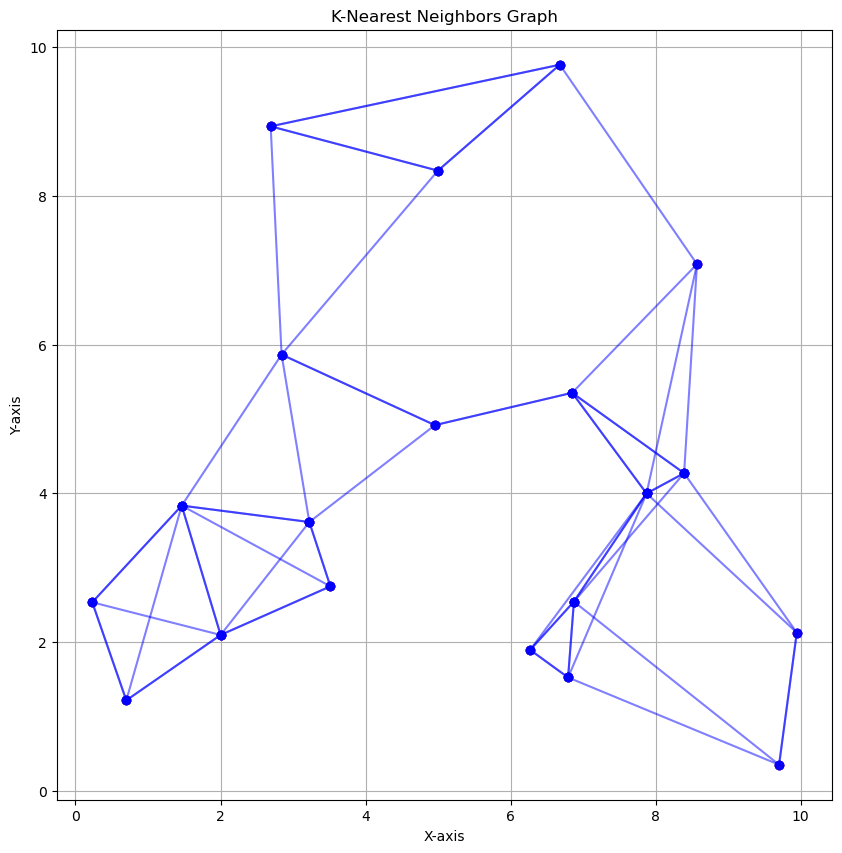

In [2]:
import matplotlib.pyplot as plt
import random
import math

# Step 1: Generate synthetic data
def generate_data(num_points, x_range, y_range):
    """Generates random data points within specified ranges."""
    points = [(random.uniform(*x_range), random.uniform(*y_range)) for _ in range(num_points)]
    return points

# Step 2: Compute pairwise distances
def compute_distances(points):
    """Computes pairwise Euclidean distances between points."""
    distances = []
    num_points = len(points)
    for i in range(num_points):
        row = []
        for j in range(num_points):
            if i == j:
                row.append(0)
            else:
                dist = math.sqrt((points[i][0] - points[j][0]) ** 2 + (points[i][1] - points[j][1]) ** 2)
                row.append(dist)
        distances.append(row)
    return distances

# Step 3: Construct K-nearest neighbor graph
def k_nearest_neighbors(points, k):
    """Constructs a K-nearest neighbors graph."""
    distances = compute_distances(points)
    graph = {i: [] for i in range(len(points))}
    
    for i in range(len(distances)):
        # Get indices of the k nearest neighbors
        nearest_indices = sorted(range(len(distances[i])), key=lambda x: distances[i][x])[:k + 1]  # +1 to include self
        for j in nearest_indices:
            if i != j:  # Avoid connecting to itself
                graph[i].append(j)
    
    return graph

# Step 4: Visualize the graph
def plot_graph(points, graph):
    """Plots the K-nearest neighbors graph."""
    plt.figure(figsize=(10, 10))
    for i, neighbors in graph.items():
        for j in neighbors:
            plt.plot([points[i][0], points[j][0]], [points[i][1], points[j][1]], 'bo-', alpha=0.5)  # Draw edges
    plt.scatter(*zip(*points), color='red')  # Plot points
    plt.title('K-Nearest Neighbors Graph')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.grid()
    plt.show()

# Parameters
num_points = 20  # Number of points to generate
x_range = (0, 10)  # X-axis range
y_range = (0, 10)  # Y-axis range
k = 3  # Number of nearest neighbors

# Main execution
points = generate_data(num_points, x_range, y_range)
graph = k_nearest_neighbors(points, k)
plot_graph(points, graph)


## Graph Laplacian Matrices

The key problem of learning graph topology can be cast as a problem of learning the so-called graph Laplacian matrices, as they uniquely characterize a graph. In other words, graph Laplacian matrices are an essential operator in spectral graph theory.

### Definition  (Graph Laplacian Matrix)

The Laplacian matrix of graph $ G(V, E, W) $ is defined as 

$$
L = D - W
$$

with elements given by:

$$
L(u, v) =
\begin{cases}
d_v, & \text{if } u = v; \\
-1, & \text{if } (u, v) \in E; \\
0, & \text{otherwise.}
\end{cases}
$$

Here, $ d_v $ denotes the degree of node $ v $.

The corresponding normalized Laplacian matrix is given by:

$$
L(u, v) =
\begin{cases}
1, & \text{if } u = v \text{ and } d_v \neq 0; \\
-\frac{1}{\sqrt{d_u d_v}}, & \text{if } (u, v) \in E; \\
0, & \text{otherwise.}
\end{cases}
$$

The unnormalized graph Laplacian $ L $ is also called the combinatorial graph Laplacian. 

There are two common normalized graph Laplacian matrices:

- **Symmetric normalized graph Laplacian**:

$$
L_{\text{sym}} = D^{-1/2} L D^{-1/2} = I - D^{-1/2} W D^{-1/2}.
$$

- **Random walk normalized graph Laplacian**:

$$
L_{\text{rw}} = D^{-1} L = D^{-1} W.
$$

The quadratic form of Laplacian matrices is given by:

$$
u^T L u = u^T D u - u^T W u = \sum_{i=1}^{N} d_i u_i^2 - \sum_{i=1}^{N} \sum_{j=1}^{N} u_i w_{ij} u_j.
$$

This can be rewritten as:

$$
u^T L u = \sum_{i=1}^{N} d_i u_i^2 - 2 \sum_{i=1}^{N} \sum_{j=1}^{N} u_i w_{ij} u_j.
$$

Further simplification yields:

$$
u^T L u = \frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} w_{ij} (u_i - u_j)^2.
$$


The quadratic form of the Laplacian matrix is given by:

$$
u^T L u = \frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} w_{ij} (u_i - u_j)^2 \geq 0, \tag{6.16.13}
$$

where the equality holds if and only if $ u_i = u_j $ for all $ i, j \in \{1, \ldots, N\} $, i.e., $ u = \mathbf{1}_N = [1, \ldots, 1]^T \in \mathbb{R}^N $.

If $ u = \mathbf{1}_N $, then:

$$
[L u]_i = [(D - W) u]_i = \sum_{j=1}^{N} d_{ij} u_j - \sum_{j=1}^{N} w_{ij} u_j = d_i - d_i = 0,
$$

because $ u_j \equiv 1 $, which implies:

$$
\sum_{j=1}^{N} d_{ij} = d_i, \quad \text{and} \quad \sum_{j=1}^{N} w_{ij} = d_i.
$$

Therefore, we have:

$$
L u = \lambda u \quad \text{for } u = \mathbf{1}_N \Rightarrow \lambda = 0. \tag{6.16.14}
$$

Equations (6.16.13) and (6.16.14) provide the following important properties of Laplacian matrices:

- The Laplacian matrix $ L = D - W $ is a positive semi-definite matrix.
- The minimum eigenvalue of the Laplacian matrix $ L $ is $ 0 $, and the eigenvector corresponding to the minimum eigenvalue is a vector with all entries equal to $ 1 $.



Adjacency Matrix:
 [[0. 1. 1. 0. 0.]
 [1. 0. 1. 1. 0.]
 [1. 1. 0. 0. 0.]
 [0. 1. 0. 0. 1.]
 [0. 0. 0. 1. 0.]]
Degree Matrix:
 [[2. 0. 0. 0. 0.]
 [0. 3. 0. 0. 0.]
 [0. 0. 2. 0. 0.]
 [0. 0. 0. 2. 0.]
 [0. 0. 0. 0. 1.]]
Laplacian Matrix:
 [[ 2. -1. -1.  0.  0.]
 [-1.  3. -1. -1.  0.]
 [-1. -1.  2.  0.  0.]
 [ 0. -1.  0.  2. -1.]
 [ 0.  0.  0. -1.  1.]]


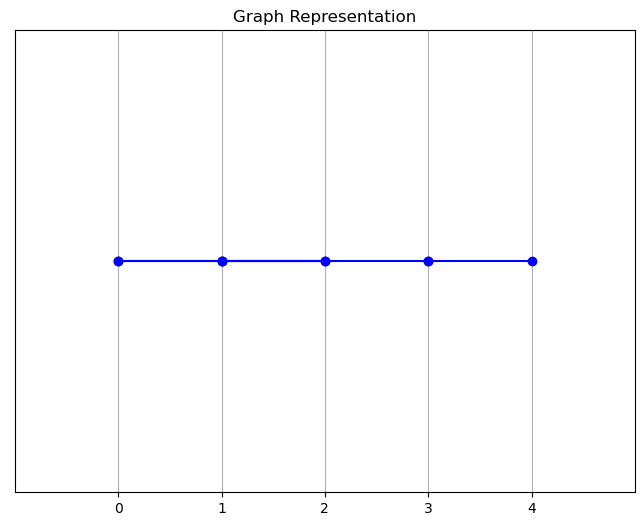

In [3]:
import matplotlib.pyplot as plt
import numpy as np

class Graph:
    def __init__(self, vertices):
        """Initialize the graph with a specified number of vertices."""
        self.vertices = vertices  # Number of vertices
        self.adjacency_matrix = np.zeros((vertices, vertices))  # Adjacency matrix
        self.degree_matrix = np.zeros((vertices, vertices))  # Degree matrix
        self.laplacian_matrix = np.zeros((vertices, vertices))  # Laplacian matrix

    def add_edge(self, u, v, weight=1):
        """Add an edge to the graph with a specified weight."""
        self.adjacency_matrix[u][v] = weight
        self.adjacency_matrix[v][u] = weight  # Undirected graph
        self.update_degree_matrix()

    def update_degree_matrix(self):
        """Update the degree matrix based on the adjacency matrix."""
        for i in range(self.vertices):
            self.degree_matrix[i][i] = np.sum(self.adjacency_matrix[i])

    def compute_laplacian_matrix(self):
        """Compute the Laplacian matrix L = D - W."""
        self.laplacian_matrix = self.degree_matrix - self.adjacency_matrix

    def display_graph(self):
        """Display the graph using Matplotlib."""
        plt.figure(figsize=(8, 6))
        for i in range(self.vertices):
            for j in range(i + 1, self.vertices):
                if self.adjacency_matrix[i][j] != 0:
                    plt.plot([i, j], [0, 0], 'bo-')  # Plot edges
        plt.xlim(-1, self.vertices)
        plt.ylim(-1, 1)
        plt.title("Graph Representation")
        plt.xticks(range(self.vertices))
        plt.yticks([])
        plt.grid()
        plt.show()

# Example usage
if __name__ == "__main__":
    # Create a graph with 5 vertices
    graph = Graph(5)
    
    # Add edges
    graph.add_edge(0, 1, 1)
    graph.add_edge(0, 2, 1)
    graph.add_edge(1, 2, 1)
    graph.add_edge(1, 3, 1)
    graph.add_edge(3, 4, 1)

    # Compute the Laplacian matrix
    graph.compute_laplacian_matrix()

    # Print matrices
    print("Adjacency Matrix:\n", graph.adjacency_matrix)
    print("Degree Matrix:\n", graph.degree_matrix)
    print("Laplacian Matrix:\n", graph.laplacian_matrix)

    # Display the graph
    graph.display_graph()


## Graph Spectrum

As the combinatorial graph Laplacian and the two normalized graph Laplacians are all real symmetric positive semi-definite matrices, they admit an eigen-decomposition:

$$ L = U \Lambda U^T $$ 

with 

$$ U = [u_0, u_1, \dots, u_{n-1}] \in \mathbb{R}^{n \times n} \quad \text{and} \quad \Lambda = \text{Diag}(\lambda_0, \lambda_1, \dots, \lambda_{n-1}) \in \mathbb{R}^{n \times n} $$

A complete set of orthonormal eigenvectors 

$$ \{u_0, u_1, \dots, u_{n-1}\} $$ 

is known as the **graph Fourier basis**. The multiplicity of a zero Laplacian eigenvalue is equal to the number of connected components of the graph, and hence the real non-negative eigenvalues are ordered as:

$$ 0 = \lambda_0 \leq \lambda_1 \leq \lambda_2 \leq \dots \leq \lambda_{n-1} = \lambda_{\text{max}} $$

The set of the graph Laplacian eigenvalues, 

$$ \sigma(L) = \{\lambda_0, \lambda_1, \dots, \lambda_{n-1}\} $$ 

is usually referred to as the **graph spectrum** of $ L $ (or the spectrum of the associated graph $ G $).

### Proposition 

The graph Laplacian $ L $ satisfies the following properties:

1. For every vector $ f \in \mathbb{R}^n $ and any graph Laplacian among $ L, L_{\text{sys}}, L_{\text{rw}} $, we have:

   $$
   \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} w_{ij} (f_i - f_j)^2 = f^T L f
   $$

2. Any graph Laplacian among $ L, L_{\text{sys}}, L_{\text{rw}} $ is symmetric and positive semi-definite.

3. The smallest eigenvalue of either $ L $ or $ L_{\text{rw}} $ is 0, and $ \mathbf{1} $ (a constant vector of all 1's) is an eigenvector associated with the eigenvalue 0. Although 0 is also an eigenvalue of $ L_{\text{norm}} $, its associated eigenvector is $ D^{1/2} \mathbf{1} $.

4. If a graph Laplacian has $ k $ eigenvalues equal to 0, then it has $ N - k $ positive, real-valued eigenvalues.

### Graph-Based Methods

- **Graph Principal Component Analysis (GPCA)**: If $ p $ is the number of eigenvalues equal to 0 and $ q $ is the number of the smallest eigenvalues not equal to zero, then the Laplacian $ L $ has $ N - (p + q) $ dominant eigenvalues. The corresponding eigenvectors give the graph principal component analysis.
  
- **Graph Minor Component Analysis (GMCA)**: If the minor components in standard minor component analysis (MCA) are replaced by the eigenvectors corresponding to the $ q $ smallest eigenvalues of $ L $ not equal to zero, it extends to GMCA.
  
- **Graph K-means Clustering**: If there are $ K $ distinct clusters in the data, then $ K = N - (p + q) $ dominant non-negative eigenvalues estimate the number of clusters in the data.

### Edge Derivative

Let $ e = (i, j) $ denote the edge between vertices $ i $ and $ j $. The edge derivative of a function $ f $ with respect to $ e $ at vertex $ i $ is defined as:

$$
\frac{\partial f}{\partial e} \bigg|_i = w_{ij} \left( \frac{f_i}{d_i} - \frac{f_j}{d_j} \right)
$$


Eigenvalues: (0, 0, 0, 0)
Eigenvectors:
[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1]


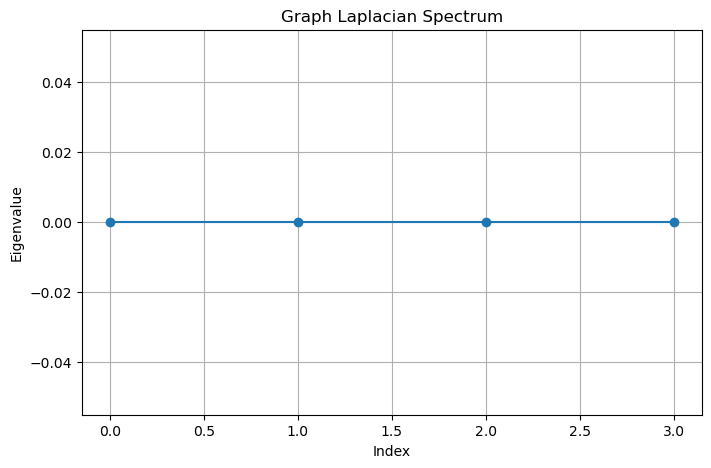

In [2]:
import matplotlib.pyplot as plt

# Function to compute the degree matrix D for a graph
def degree_matrix(adj_matrix):
    # Degree matrix is diagonal with node degrees
    degrees = [sum(row) for row in adj_matrix]
    D = [[degrees[i] if i == j else 0 for j in range(len(adj_matrix))] for i in range(len(adj_matrix))]
    return D

# Function to compute the combinatorial graph Laplacian L
def graph_laplacian(adj_matrix):
    D = degree_matrix(adj_matrix)
    # L = D - A, where A is the adjacency matrix
    L = [[D[i][j] - adj_matrix[i][j] for j in range(len(adj_matrix))] for i in range(len(adj_matrix))]
    return L

# Function to compute the eigenvalues and eigenvectors (via power iteration)
def power_iteration(A, num_simulations=1000):
    b_k = [1] * len(A)  # initial random vector
    for _ in range(num_simulations):
        # Multiply by matrix
        b_k1 = [sum(A[i][j] * b_k[j] for j in range(len(A))) for i in range(len(A))]
        # Normalize the vector
        norm = sum(x**2 for x in b_k1) ** 0.5
        
        if norm == 0:  # Avoid division by zero
            return b_k  # Return the current vector as is
        
        b_k = [x / norm for x in b_k1]
    return b_k

# Function to find eigenvalues and eigenvectors
def eigen_decomposition(L):
    eigenvalues = []
    eigenvectors = []
    
    # Perform power iteration for each dimension (basic simulation here for simplicity)
    for _ in range(len(L)):
        eigenvector = power_iteration(L)
        eigenvectors.append(eigenvector)
        # Approximate eigenvalue by Rayleigh quotient
        eigenvalue = sum(eigenvector[i] * sum(L[i][j] * eigenvector[j] for j in range(len(L))) for i in range(len(L)))
        eigenvalues.append(eigenvalue)

    # Sort by eigenvalue
    sorted_pairs = sorted(zip(eigenvalues, eigenvectors), key=lambda x: x[0])
    sorted_eigenvalues, sorted_eigenvectors = zip(*sorted_pairs)
    
    return sorted_eigenvalues, sorted_eigenvectors

# Plotting the spectrum (eigenvalues)
def plot_spectrum(eigenvalues):
    plt.figure(figsize=(8, 5))
    plt.plot(eigenvalues, marker='o')
    plt.title("Graph Laplacian Spectrum")
    plt.xlabel("Index")
    plt.ylabel("Eigenvalue")
    plt.grid(True)
    plt.show()

# Example adjacency matrix for an undirected graph
adj_matrix = [
    [0, 1, 0, 1],
    [1, 0, 1, 1],
    [0, 1, 0, 1],
    [1, 1, 1, 0]
]

# Compute the graph Laplacian
L = graph_laplacian(adj_matrix)

# Get the eigenvalues and eigenvectors
eigenvalues, eigenvectors = eigen_decomposition(L)

# Display results
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:")
for vec in eigenvectors:
    print(vec)

# Plot the graph spectrum
plot_spectrum(eigenvalues)


### Graph Fourier Transform

The **local variation** of a function $ f $ at each vertex $ j $ is defined as:

$$
\|\nabla_j f\|^2 = \sum_{e \in e_j} \left( \frac{\partial f}{\partial e} \right)^2
$$

where $ e_j $ denotes the set of edges incident with vertex \( j \).

The **smoothness** of $ f $ is measured by the sum of the local variations at each vertex:

$$
S(f) = \frac{1}{2} \sum_j \|\nabla_j f\|^2
$$

The **graph Laplacian** $ L = D - W $ is a difference operator, and for any signal $ f \in \mathbb{R}^n $, it satisfies:

$$
(Lf)(i) = \sum_{j \in N_i} w_{ij} (f_i - f_j)
$$

where $ N_i $ is the set of vertices connected to vertex $ i $ by an edge.

---

### Classical Fourier Transform

The classical Fourier transform is defined as:

$$
\hat{f}(\xi) = \langle f, e^{j 2\pi \xi t} \rangle = \int_{-\infty}^{\infty} f(t) e^{-j 2\pi \xi t} dt
$$

where the complex exponentials \( e^{j 2\pi \xi t} \) are the eigenfunctions of the 1-dimensional Laplace operator:

$$
L(e^{j 2\pi \xi t}) = -(2\pi \xi)^2 e^{j 2\pi \xi t}
$$

---

### Graph Fourier Transform

The **graph Fourier transform** $ \hat{f}(\lambda_l) $ of any function $ f \in \mathbb{R}^n $ on the vertices of $ G $ is defined as the expansion of $ f $ in terms of the eigenvectors $ u_l $ of the graph Laplacian:

$$
\hat{f}(\lambda_l) = \langle f, u_l \rangle = \sum_{i=0}^{n-1} f_i u_l^*(i), \quad l = 0, 1, \dots, n-1
$$

or written in matrix-vector form:

$$
\hat{f} = U^H f \in \mathbb{R}^n
$$

where $ U = [u_0, u_1, \dots, u_{n-1}] $.

---

### Graph Inverse Fourier Transform

The **graph inverse Fourier transform** is given by:

$$
f_i = \sum_{l=0}^{n-1} \hat{f}(\lambda_l) u_l(i), \quad i = 0, 1, \dots, n-1
$$

or in matrix form:

$$
f = U \hat{f}
$$

---

### Interpretation of Eigenvalues

In classical Fourier analysis, the eigenvalues $ (2\pi \xi)^2 $ correspond to a specific notion of frequency. Similarly, in the graph setting:

- **Low frequencies** (small $ \lambda_l $): The graph Laplacian eigenvectors vary slowly across the graph. Vertices connected by edges with large weights are likely to have similar values.
- **High frequencies** (large $ \lambda_l $): The eigenvectors oscillate more rapidly and are more likely to have dissimilar values at vertices connected by edges with high weight.


Original signal f: [1, 2, 3, 4]
Graph Fourier Transform f̂: [10, 10, 10, 10]
Reconstructed signal f: [40, 40, 40, 40]


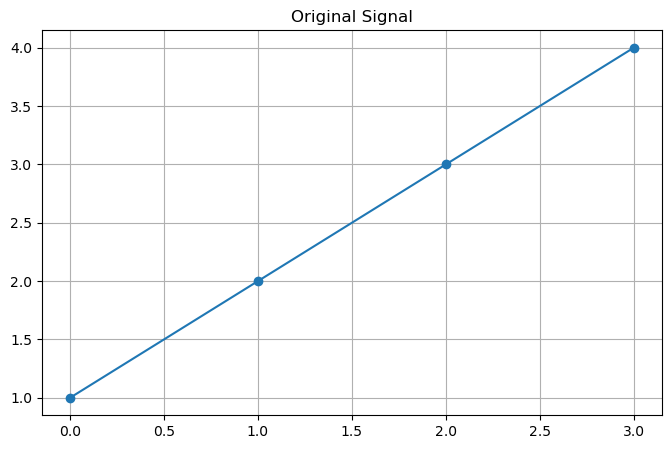

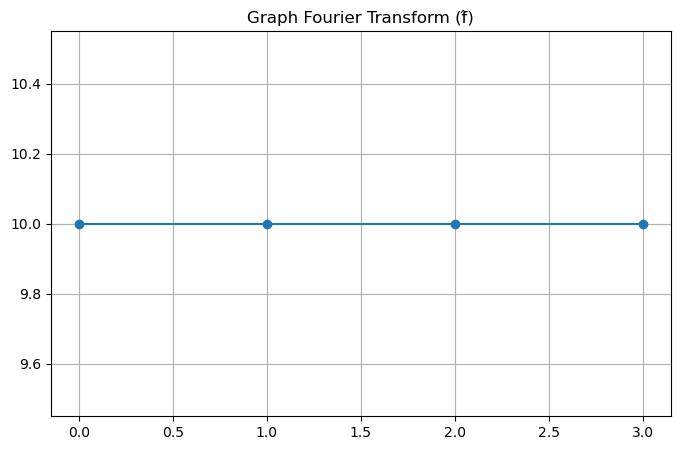

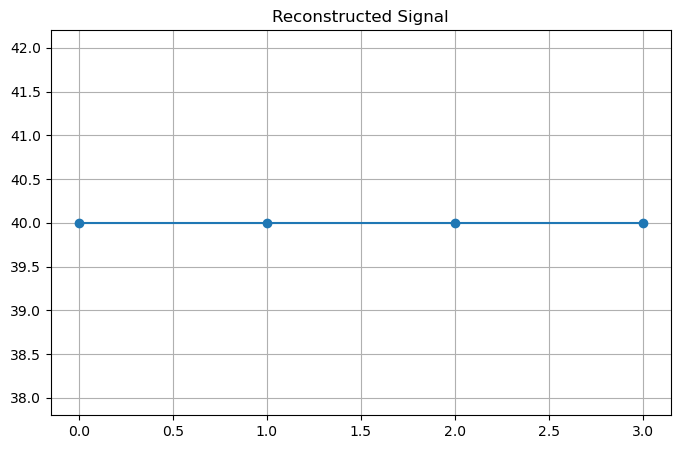

In [3]:
import matplotlib.pyplot as plt

# Function to compute the degree matrix D for a graph
def degree_matrix(adj_matrix):
    degrees = [sum(row) for row in adj_matrix]
    D = [[degrees[i] if i == j else 0 for j in range(len(adj_matrix))] for i in range(len(adj_matrix))]
    return D

# Function to compute the combinatorial graph Laplacian L
def graph_laplacian(adj_matrix):
    D = degree_matrix(adj_matrix)
    L = [[D[i][j] - adj_matrix[i][j] for j in range(len(adj_matrix))] for i in range(len(adj_matrix))]
    return L

# Function to compute the eigenvalues and eigenvectors using power iteration
def power_iteration(A, num_simulations=1000):
    b_k = [1] * len(A)  # Initial vector
    for _ in range(num_simulations):
        # Multiply by matrix
        b_k1 = [sum(A[i][j] * b_k[j] for j in range(len(A))) for i in range(len(A))]
        # Normalize the vector
        norm = sum(x**2 for x in b_k1) ** 0.5
        if norm == 0:
            return b_k
        b_k = [x / norm for x in b_k1]
    return b_k

# Function to compute eigenvalues and eigenvectors
def eigen_decomposition(L):
    eigenvalues = []
    eigenvectors = []
    for _ in range(len(L)):
        eigenvector = power_iteration(L)
        eigenvectors.append(eigenvector)
        # Estimate eigenvalue using Rayleigh quotient
        eigenvalue = sum(eigenvector[i] * sum(L[i][j] * eigenvector[j] for j in range(len(L))) for i in range(len(L)))
        eigenvalues.append(eigenvalue)

    # Sort eigenvalues and eigenvectors
    sorted_pairs = sorted(zip(eigenvalues, eigenvectors), key=lambda x: x[0])
    sorted_eigenvalues, sorted_eigenvectors = zip(*sorted_pairs)
    return sorted_eigenvalues, sorted_eigenvectors

# Function to perform the Graph Fourier Transform
def graph_fourier_transform(f, U):
    f_hat = [sum(f[i] * U[j][i] for i in range(len(f))) for j in range(len(f))]
    return f_hat

# Function to perform the Inverse Graph Fourier Transform
def inverse_graph_fourier_transform(f_hat, U):
    f_reconstructed = [sum(f_hat[j] * U[j][i] for j in range(len(f_hat))) for i in range(len(f_hat))]
    return f_reconstructed

# Plotting the signal and its transform
def plot_signal(signal, title):
    plt.figure(figsize=(8, 5))
    plt.plot(signal, marker='o')
    plt.title(title)
    plt.grid(True)
    plt.show()

# Example adjacency matrix for an undirected graph
adj_matrix = [
    [0, 1, 0, 1],
    [1, 0, 1, 1],
    [0, 1, 0, 1],
    [1, 1, 1, 0]
]

# Example graph signal
f = [1, 2, 3, 4]

# Compute the graph Laplacian
L = graph_laplacian(adj_matrix)

# Get the eigenvalues and eigenvectors
eigenvalues, eigenvectors = eigen_decomposition(L)

# Perform Graph Fourier Transform
f_hat = graph_fourier_transform(f, eigenvectors)

# Perform Inverse Graph Fourier Transform
f_reconstructed = inverse_graph_fourier_transform(f_hat, eigenvectors)

# Display results
print("Original signal f:", f)
print("Graph Fourier Transform f̂:", f_hat)
print("Reconstructed signal f:", f_reconstructed)

# Plot original signal and reconstructed signal
plot_signal(f, "Original Signal")
plot_signal(f_hat, "Graph Fourier Transform (f̂)")
plot_signal(f_reconstructed, "Reconstructed Signal")


Original signal f: [3, 5, 1, 2, 6, 4]
Graph Fourier Transform f̂: [21, 21, 21, 21, 21, 21]
Reconstructed signal f: [126, 126, 126, 126, 126, 126]


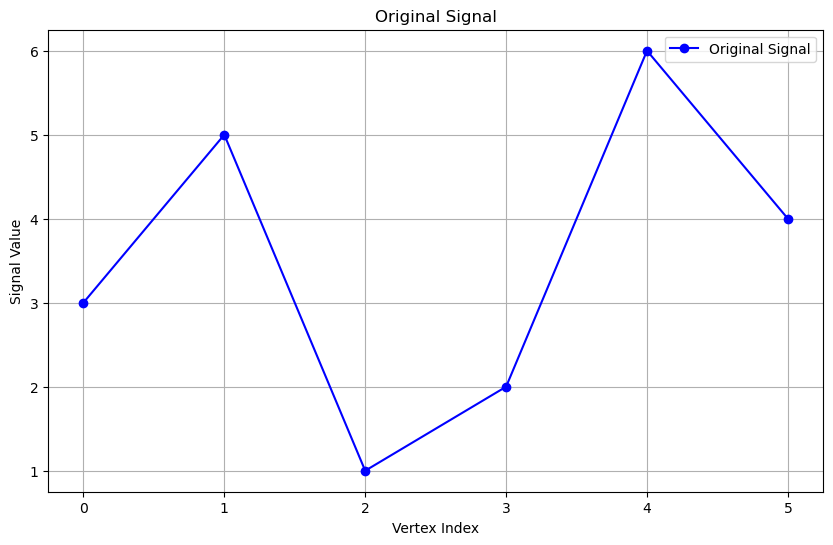

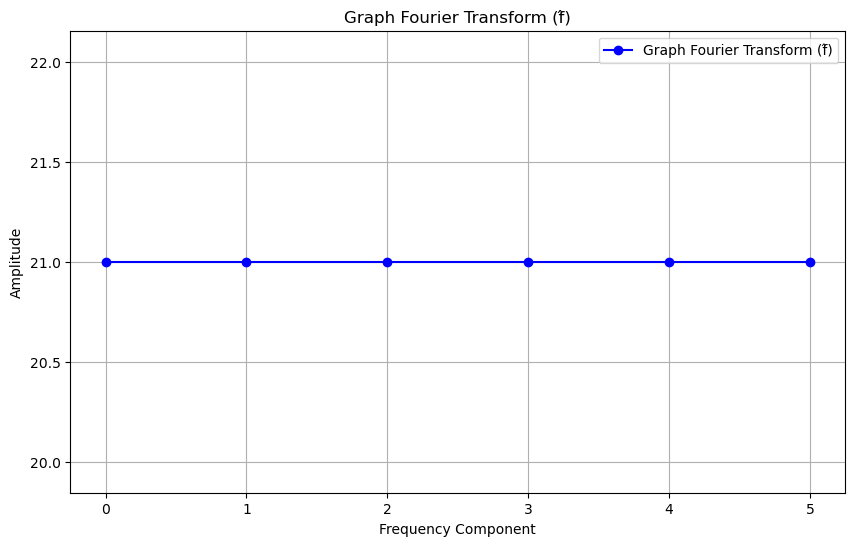

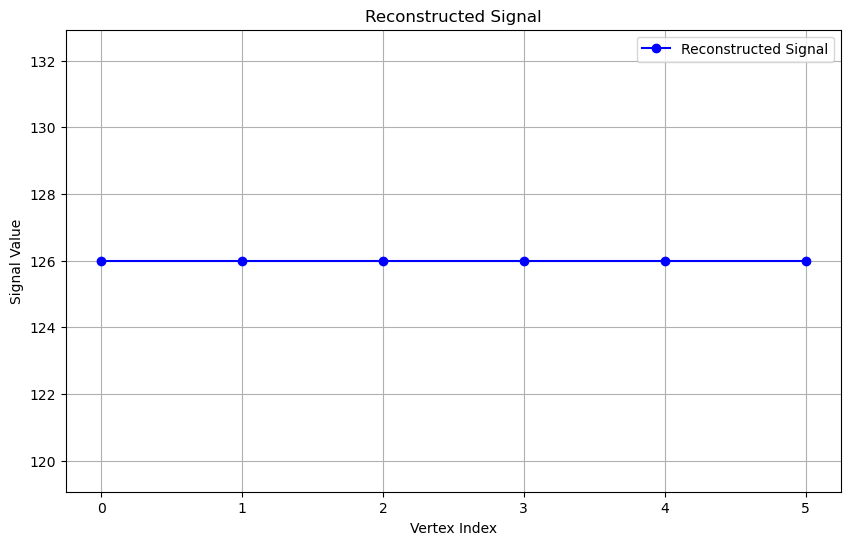

In [4]:
import matplotlib.pyplot as plt

# Function to compute the degree matrix D for a graph
def degree_matrix(adj_matrix):
    degrees = [sum(row) for row in adj_matrix]
    D = [[degrees[i] if i == j else 0 for j in range(len(adj_matrix))] for i in range(len(adj_matrix))]
    return D

# Function to compute the combinatorial graph Laplacian L
def graph_laplacian(adj_matrix):
    D = degree_matrix(adj_matrix)
    L = [[D[i][j] - adj_matrix[i][j] for j in range(len(adj_matrix))] for i in range(len(adj_matrix))]
    return L

# Function to compute the eigenvalues and eigenvectors using power iteration
def power_iteration(A, num_simulations=1000):
    b_k = [1] * len(A)  # Initial vector
    for _ in range(num_simulations):
        # Multiply by matrix
        b_k1 = [sum(A[i][j] * b_k[j] for j in range(len(A))) for i in range(len(A))]
        # Normalize the vector
        norm = sum(x**2 for x in b_k1) ** 0.5
        if norm == 0:
            return b_k
        b_k = [x / norm for x in b_k1]
    return b_k

# Function to compute eigenvalues and eigenvectors
def eigen_decomposition(L):
    eigenvalues = []
    eigenvectors = []
    for _ in range(len(L)):
        eigenvector = power_iteration(L)
        eigenvectors.append(eigenvector)
        # Estimate eigenvalue using Rayleigh quotient
        eigenvalue = sum(eigenvector[i] * sum(L[i][j] * eigenvector[j] for j in range(len(L))) for i in range(len(L)))
        eigenvalues.append(eigenvalue)

    # Sort eigenvalues and eigenvectors
    sorted_pairs = sorted(zip(eigenvalues, eigenvectors), key=lambda x: x[0])
    sorted_eigenvalues, sorted_eigenvectors = zip(*sorted_pairs)
    return sorted_eigenvalues, sorted_eigenvectors

# Function to perform the Graph Fourier Transform
def graph_fourier_transform(f, U):
    f_hat = [sum(f[i] * U[j][i] for i in range(len(f))) for j in range(len(f))]
    return f_hat

# Function to perform the Inverse Graph Fourier Transform
def inverse_graph_fourier_transform(f_hat, U):
    f_reconstructed = [sum(f_hat[j] * U[j][i] for j in range(len(f_hat))) for i in range(len(f_hat))]
    return f_reconstructed

# Plotting the signal and its transform
def plot_signal(signal, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    plt.plot(signal, marker='o', linestyle='-', color='b', label=title)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.legend()
    plt.show()

# Example adjacency matrix for a more complex undirected graph
adj_matrix = [
    [0, 1, 0, 1, 0, 0],
    [1, 0, 1, 1, 0, 0],
    [0, 1, 0, 1, 1, 0],
    [1, 1, 1, 0, 0, 1],
    [0, 0, 1, 0, 0, 1],
    [0, 0, 0, 1, 1, 0]
]

# Example graph signal (random data points representing some feature of the vertices)
f = [3, 5, 1, 2, 6, 4]

# Compute the graph Laplacian
L = graph_laplacian(adj_matrix)

# Get the eigenvalues and eigenvectors
eigenvalues, eigenvectors = eigen_decomposition(L)

# Perform Graph Fourier Transform
f_hat = graph_fourier_transform(f, eigenvectors)

# Perform Inverse Graph Fourier Transform
f_reconstructed = inverse_graph_fourier_transform(f_hat, eigenvectors)

# Display results
print("Original signal f:", f)
print("Graph Fourier Transform f̂:", f_hat)
print("Reconstructed signal f:", f_reconstructed)

# Plot original signal, Fourier transform, and reconstructed signal
plot_signal(f, "Original Signal", "Vertex Index", "Signal Value")
plot_signal(f_hat, "Graph Fourier Transform (f̂)", "Frequency Component", "Amplitude")
plot_signal(f_reconstructed, "Reconstructed Signal", "Vertex Index", "Signal Value")


## Graph Signal Processing

In this subsection, we focus on some basic operations in graph signal processing.

## Graph Filtering

In classical signal processing, given an input time signal $ f(t) $ and a time-domain filter $ h(t) $, the frequency filtering is defined as:

$$
\hat{f}_{out}(\xi) = \hat{f}_{in}(\xi) \hat{h}(\xi),
$$

where $ \hat{f}_{in}(\xi) $ and $ \hat{f}_{out}(\xi) $ are the spectrum of the input and output signals, respectively; while $ \hat{h}(\xi) $ is the transfer function of the filter. 

Taking an inverse Fourier transform of the above equation, we have the time filtering given by:

$$
f_{out}(t) = \int \hat{f}_{in}(\xi) \hat{h}(\xi) e^{j 2 \pi \xi t} d\xi = \int f_{in}(\tau) h(t - \tau) d\tau = (f * h)(t),
$$

where 

$$
(f * h)(t) = \int f_{in}(\tau) h(t - \tau) d\tau
$$

denotes the convolution product of the continuous signal $ f(t) $ and the continuous filter $ h(t) $.

For a discrete signal $ f = [f_1, \ldots, f_N]^T $, the filtering result of discrete signals is given by:

$$
f_{out}(i) = (f * h)(i) = \sum_{k=0}^{N-1} f(k) h(i - k) = \sum_{k=0}^{N-1} h(k) f(i - k).
$$

Similar to the previous equation, the graph spectral filtering can be defined as:

$$
\hat{f}_{out}(\lambda_j) = \hat{f}_{in}(\lambda_j) \hat{h}(\lambda_j),
$$

where $ \lambda_j $ is the $ j $-th eigenvalue of the Laplacian matrix $ L $. Taking the inverse Fourier transform of the above equation, we have the discrete-time graph filtering:

$$
f_{out}(i) = \sum_{j=0}^{N-1} \hat{f}_{in}(\lambda_j) \hat{h}(\lambda_j) u_j(i),
$$

where $ u_j(i) $ is the $ i $-th element of the $ N \times 1 $ eigenvector $ u_j = [u_j(1), \ldots, u_j(N)]^T $ corresponding to the eigenvalue $ \lambda_j $.

## Graph Convolution

Because the graph signal is discrete, the graph filtering can be represented using the same convolution as discrete signals:

$$
f_{out}(i) = (f_{in} * h)_G(i).
$$

However, the graph convolution 

$$
(f * h)_G(i) = \sum_{j=0}^{N-1} \hat{f}_{in}(\lambda_j) \hat{h}(\lambda_j) u_j(i)
$$

does not have the standard form of classical convolution:

$$
(f * h)(i) = \sum_{k=0}^{N-1} f(k) h(i - k) = \sum_{k=0}^{N-1} h(k) f(i - k),
$$

because there is no delayed form $ f(i - k) $ for any graphic signal $ f(i) $. By comparing the previous equations, we get the convolution product of graph signals as follows:

$$
(f * h)_G(i) = \sum_{j=0}^{N-1} \hat{f}_{in}(\lambda_j) \hat{h}(\lambda_j) u_j(i).
$$

When using the Laplacian matrix $ L $ to represent the graph convolution, we denote:

$$
f_{in} = [f_{in}(1), \ldots, f_{in}(N)]^T,
$$

$$
f_{out} = [f_{out}(1), \ldots, f_{out}(N)]^T,
$$

and 

$$
H \hat{h}(L) = U \begin{bmatrix}
\hat{h}(\lambda_0) & 0 & \ldots & 0 \\
0 & \hat{h}(\lambda_1) & \ldots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \ldots & \hat{h}(\lambda_{N-1}) 
\end{bmatrix} U^T.
$$

Therefore, the graph convolution (6.16.31) can be rewritten in matrix-vector form as:

$$
(f * h)_G = \hat{h}(L) f_{in}. \quad (6.16.35)
$$

That is to say, the graph filtering can be represented, in Laplacian form, as follows:

$$
f_{out} = \hat{h}(L) f_{in}. \quad (6.16.36)
$$


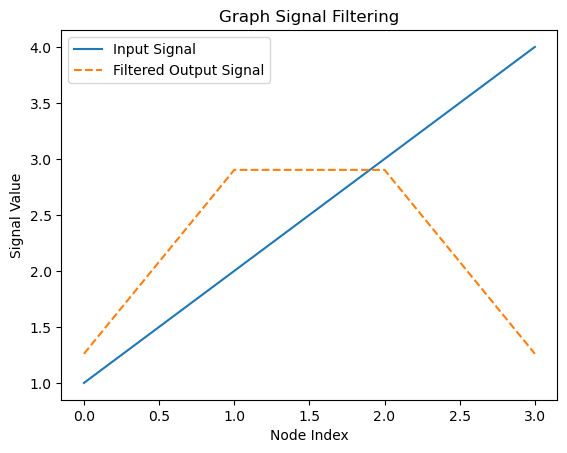

In [5]:
import matplotlib.pyplot as plt

# Define a small example graph with its weighted adjacency matrix W
W = [
    [0, 1, 0, 0],
    [1, 0, 1, 0],
    [0, 1, 0, 1],
    [0, 0, 1, 0]
]

# Step 1: Compute the degree matrix D
def compute_degree_matrix(W):
    D = [[0 for _ in range(len(W))] for _ in range(len(W))]
    for i in range(len(W)):
        D[i][i] = sum(W[i])
    return D

# Step 2: Compute the Laplacian matrix L = D - W
def compute_laplacian_matrix(W):
    D = compute_degree_matrix(W)
    L = [[D[i][i] - W[i][j] for j in range(len(W))] for i in range(len(W))]
    return L

# Step 3: Eigen-decomposition of the Laplacian matrix
def power_iteration(A, num_simulations: int):
    b_k = [1] * len(A)  # start with a simple vector
    for _ in range(num_simulations):
        # Multiply the matrix by the vector
        b_k1 = [sum(A[i][j] * b_k[j] for j in range(len(A))) for i in range(len(A))]
        # Normalize the vector
        norm = sum(x**2 for x in b_k1) ** 0.5
        if norm == 0:  # Handle division by zero
            break
        b_k = [x / norm for x in b_k1]
    return b_k

def eigen_decomposition(L, num_simulations=1000):
    eigenvalues = []
    eigenvectors = []
    for _ in range(len(L)):
        eigvec = power_iteration(L, num_simulations)
        eigenvectors.append(eigvec)
        # Simulating eigenvalue extraction
        eigenvalue = sum(L[i][i] * eigvec[i] for i in range(len(L)))
        eigenvalues.append(eigenvalue)
    return eigenvalues, eigenvectors

# Step 4: Graph filtering process
def graph_filtering(L, f_in, h_hat):
    # Eigen-decomposition of Laplacian matrix L
    eigenvalues, eigenvectors = eigen_decomposition(L)

    # Filter the input signal in the graph spectral domain
    f_hat_in = [sum(f_in[i] * eigenvectors[j][i] for i in range(len(f_in))) for j in range(len(eigenvectors))]
    f_hat_out = [f_hat_in[i] * h_hat(eigenvalues[i]) for i in range(len(eigenvalues))]

    # Inverse transform to obtain output signal
    f_out = [sum(f_hat_out[j] * eigenvectors[j][i] for j in range(len(f_hat_out))) for i in range(len(f_hat_out))]
    
    return f_out

# Example input signal f_in on the graph's vertices
f_in = [1, 2, 3, 4]

# Example filter function h_hat(λ), assuming low-pass filtering
def h_hat(λ):
    return 1 / (1 + λ)

# Compute the Laplacian matrix for the graph
L = compute_laplacian_matrix(W)

# Apply the graph filter
f_out = graph_filtering(L, f_in, h_hat)

# Plot the input and output signals
plt.plot(range(len(f_in)), f_in, label='Input Signal')
plt.plot(range(len(f_out)), f_out, label='Filtered Output Signal', linestyle='--')
plt.legend()
plt.xlabel('Node Index')
plt.ylabel('Signal Value')
plt.title('Graph Signal Filtering')
plt.show()


## p-Dirichlet Norm and Graph Regularization

## Introduction

In this notebook, we explore the approximation problem of discrete functions on a graph $ G(V, E, W) $. Many learning algorithms operate on input spaces other than $ \mathbb{R}^n $, such as discrete input spaces like strings, graphs, trees, and automata. This input space is known as the manifold.

### Graph Representation

An undirected unweighted graph $ G $ consists of:
- A set of vertices $ V $ numbered $ 1 $ to $ n $.
- A set of edges $ E $ where $ (i, j) \in E $ implies $ (j, i) \in E $.

We denote that $ i $ and $ j $ are neighbors as $ i \sim j $. The adjacency matrix $ W $ is defined as an $ n \times n $ real matrix where:

$$
w_{ij} = 
\begin{cases} 
1 & \text{if } i \sim j \\
0 & \text{otherwise}
\end{cases}
$$

## Smoothness Functional

To approximate a function on a graph $ G $ using the weight matrix $ W $, we need to define a smoothness functional $ S(f) $ that should be minimized. This is given by:

$$
S(f) = \sum_{i \sim j} w_{ij} (f_i - f_j)^2
$$

## p-Dirichlet Norms

The discrete $ p $-Dirichlet norm of a graph signal $ f = [f_1, \ldots, f_N]^T $ is defined as:

$$
S_p(f) = \left( \sum_{i \in V} \sum_{j \in N_i} w_{ij} (f_j - f_i)^2 \right)^{p/2}
$$

### Common p-Dirichlet Norms

- **1-Dirichlet Norm** ($ p = 1 $):

$$
S_1(f) = \left( \sum_{i \in V} \sum_{j \in N_i} w_{ij} (f_j - f_i)^2 \right)^{1/2}
$$

This represents the total variation of the signal with respect to the graph.

- **2-Dirichlet Norm** ($ p = 2 $):

$$
S_2(f) = \sum_{i \in V} \sum_{j \in N_i} w_{ij} (f_j - f_i)^2 = f^T L f
$$

where $ L $ is the Laplacian matrix of the graph.

## Graph Tikhonov Regularization

Given a noisy graph signal $ y = f_0 + e $, where $ f_0 $ is the true graph signal and $ e $ is uncorrelated additive Gaussian noise, we want to recover $ f_0 $. Using the 2-Dirichlet form $ S_2(f) = f^T L f $ in the Tikhonov regularization method leads to the following optimization problem:

$$
\arg \min_f \| f - y \|_2^2 + \lambda f^T L f
$$

### Tikhonov Solution

The Tikhonov solution $ f^* $ to the optimization problem is given by:

$$
f^*(i) = \frac{\hat{y}(\lambda)}{1 + \gamma \lambda} u(i) \quad \forall i = \{1, 2, \ldots, N\}
$$

## Graph Kernels

Kernel-based algorithms capture the structure of $ X $ via the kernel $ K: X \times X \to \mathbb{R} $. Regularization on graphs is a critical step for manifold learning.

Given labeled examples $ (x_i, y_i) $ and unlabeled examples $ \{x_j\}_{j=l+1}^{l+u} $, we consider the following optimization problem:

$$
f^* = \arg \min_f \left( V(x_i, y_i, f) + \gamma_A \| f \|_K^2 + I \hat{f}^T L \hat{f} \right)
$$

where $ \hat{f} = [f(x_1), \ldots, f(x_{l+u})]^T $ and $ L $ is the Laplacian matrix $ L = D - W $.

## Conclusion

In this notebook, we have defined the p-Dirichlet norms and explored their applications in graph-based signal processing and regularization. Understanding these concepts is crucial for advancing manifold learning techniques and developing robust algorithms for discrete data structures.


## Normalization Coefficient

The diagonal entries of the normalized Laplacian can be defined as:

$$
D_{ii} = \frac{1}{l+u} \sum_{j=1}^{l+u} w_{ij}
$$

The normalizing coefficient \((l+u)^2\) is the natural scale factor for the empirical estimate of the Laplace operator. On a sparse adjacency graph, this can be replaced by:

$$
\sum_{i=1}^{l+u} \sum_{j=1}^{l+u} w_{ij}
$$

## Regularization Matrix and Kernel Matrix

### Corollary 

Denote by $ P = r(L̃) $ a regularization matrix, then the corresponding kernel matrix is given by the inverse $ K = r^{-1}(L̃) $ or the pseudo-inverse $ K = r^{\dagger}(L̃) $ wherever necessary. More specifically, if $\{(\lambda_i, v_i)\}$ constitute the eigensystem of $ L̃ $, we have:

$$
K = \sum_{i=1}^{m} r^{-1}(\lambda_i) v_i v_i^T
$$

where $ 0^{-1} = 0 $.

### Graph Kernel Matrices

In the context of spectral graph theory and segmentation, the following graph kernel matrices are of particular interest:

- $ K = (I + \sigma^2 L̃)^{-1} $ (Regularized Laplacian)
- $ K = \exp\left(\frac{\sigma^2}{2} L̃\right) $ (Diffusion Process)
- $ K = (aI - L̃)^p $ with $ a \geq 2 $ (One-Step Random Walk)
- $ K = \cos\left(\frac{L̃ \pi}{4}\right) $ (Inverse Cosine)

## Theorem

The minimizer of the optimization problem (6.16.42) admits an expansion:

$$
f^*(x) = \sum_{i=1}^{l+u} \alpha_i K(x_i, x)
$$

in terms of the labeled examples $(x_i, y_i)$ for $i=1$ to $l$ and unlabeled examples $\{x_j\}_{j=l+1}^{l+u}$.

### Loss Function

If we take the squared loss function in (6.16.42) as:

$$
V(x_i, y_i, f) = (y_i - f(x_i))^2
$$

then the minimizer of the $(l + u)$-dimensional expansion coefficient vector $ \alpha = [\alpha_1, \ldots, \alpha_{l+u}]^T $ in (6.16.44) is given by:

$$
\alpha^* = \left(JK + \gamma A l I + L K y\right)^{-1} \frac{1}{(l + u)^2}
$$

where $ K $ is the $(l + u) \times (l + u)$ Gram matrix over labeled and unlabeled points; $ y $ is an $(l + u)$-dimensional label vector given by:

$$
y = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_l \\ 0 \\ \vdots \\ 0 \end{bmatrix}
$$


## Algorithm : Manifold Regularization Algorithms

1. **Input:** Labeled examples $\{(x_i, y_i)\}_{i=1}^l$ and unlabeled examples $\{x_j\}_{j=l+1}^{l+u}$

2. **Construct Data Adjacency Graph:**
   - Create a graph with $(l + u)$ nodes using methods such as k-nearest neighbors.
   - Choose edge weights:
     $$
     w_{ij} = \exp\left(-\frac{\|x_i - x_j\|^2}{4l}\right)
     $$

3. **Choose a Kernel Function:** 
   - Compute the Gram matrix:
     $$
     K_{ij} = K(x_i, x_j)
     $$

4. **Compute Graph Laplacian Matrix:** 
   - Calculate:
     $$
     L = D - W
     $$
   - Where $ D = \text{Diag}(W_{1,1}, \ldots, W_{l+u,l+u}) $

5. **Choose Parameters:** 
   - Set $\gamma_A$ and $\gamma_I$.

6. **Compute Coefficients:**
   - Calculate:
     $$
     \alpha^* = (JK + \gamma_A l I + \frac{1}{(l + u)^2} L K y)^{-1}
     $$

7. **Output:**
   - The function $ f(x) $ is given by:
     $$
     f(x) = \sum_{i=1}^{l+u} \alpha_i K(x_i, x)
     $$

**Note:** When $\gamma_I = 0$, Equation (6.16.42) results in zero coefficients for unlabeled data, making the coefficients for labeled data equivalent to those in standard Regularized Least Squares (RLS).


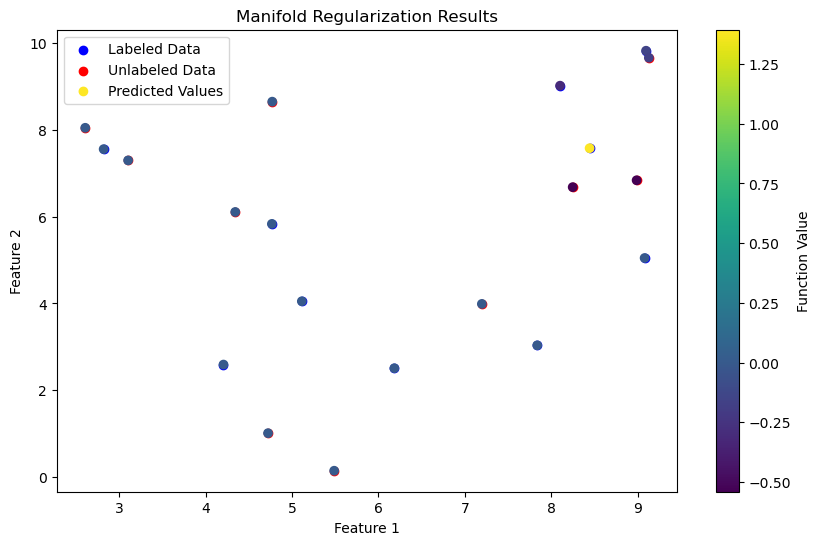

In [6]:
import matplotlib.pyplot as plt
import math
import random

# Define the kernel function
def kernel_function(xi, xj):
    """Compute the kernel function."""
    return 1 / (1 + euclidean_distance(xi, xj)**2)

# Calculate Euclidean distance
def euclidean_distance(xi, xj):
    """Calculate the Euclidean distance between two points."""
    return math.sqrt(sum((xi[d] - xj[d]) ** 2 for d in range(len(xi))))

# Construct the adjacency graph
def construct_adjacency_graph(X, k):
    """Construct an adjacency graph using k-nearest neighbors."""
    n = len(X)
    W = [[0 for _ in range(n)] for _ in range(n)]
    
    for i in range(n):
        distances = []
        for j in range(n):
            if i != j:
                distances.append((euclidean_distance(X[i], X[j]), j))
        
        # Sort distances and take k nearest
        distances.sort(key=lambda x: x[0])
        for _, index in distances[:k]:
            W[i][index] = kernel_function(X[i], X[index])  # Set the edge weight
    
    return W

# Compute the Laplacian matrix
def compute_laplacian(W):
    """Compute the graph Laplacian matrix."""
    n = len(W)
    D = [[0 for _ in range(n)] for _ in range(n)]  # Degree matrix
    L = [[0 for _ in range(n)] for _ in range(n)]  # Laplacian matrix
    
    for i in range(n):
        D[i][i] = sum(W[i])  # Degree of node i
    
    # L = D - W
    for i in range(n):
        for j in range(n):
            L[i][j] = D[i][j] - W[i][j]
    
    return L

# Matrix multiplication
def matrix_mult(A, B):
    """Multiply two matrices A and B."""
    n = len(A)
    m = len(B[0])
    C = [[0 for _ in range(m)] for _ in range(n)]
    
    for i in range(n):
        for j in range(m):
            for k in range(len(A[0])):
                C[i][j] += A[i][k] * B[k][j]
    
    return C

# Matrix inversion (Gaussian elimination)
def invert_matrix(M):
    """Invert a square matrix M using Gaussian elimination."""
    n = len(M)
    I = [[float(i == j) for j in range(n)] for i in range(n)]  # Identity matrix
    A = [row[:] for row in M]  # Copy of M
    
    # Forward elimination
    for i in range(n):
        # Make the diagonal contain all 1's
        diag = A[i][i]
        for j in range(n):
            A[i][j] /= diag
            I[i][j] /= diag
        
        for j in range(i + 1, n):
            factor = A[j][i]
            for k in range(n):
                A[j][k] -= factor * A[i][k]
                I[j][k] -= factor * I[i][k]
    
    # Back substitution
    for i in range(n - 1, -1, -1):
        for j in range(i - 1, -1, -1):
            factor = A[j][i]
            for k in range(n):
                A[j][k] -= factor * A[i][k]
                I[j][k] -= factor * I[i][k]
    
    return I

# Implement the manifold regularization algorithm
def manifold_regularization(X, y, l, u, k, gamma_A, gamma_I):
    """Perform manifold regularization."""
    # Step 1: Construct the adjacency graph
    W = construct_adjacency_graph(X, k)

    # Step 2: Compute the Gram matrix using the kernel function
    n = l + u
    K = [[0 for _ in range(n)] for _ in range(n)]
    for i in range(n):
        for j in range(n):
            K[i][j] = kernel_function(X[i], X[j])

    # Step 3: Compute the Laplacian matrix
    L = compute_laplacian(W)

    # Step 4: Prepare the matrices for alpha coefficients
    JK = [[1 if i == j else 0 for j in range(n)] for i in range(n)]  # Identity matrix for JK
    LKy = [[L[i][j] * y[j] for j in range(n)] for i in range(n)]  # L * y (unlabeled data considered as 0)
    
    # Calculate alpha using the formula
    A_inv = invert_matrix([[JK[i][j] + gamma_A * (1 if i == j else 0) + (1 / (l + u)**2) * L[i][j] for j in range(n)] for i in range(n)])
    alpha_star = matrix_mult(A_inv, LKy)
    
    return [alpha_star[i][0] for i in range(n)]  # Convert from matrix to list

# Test data generation
def generate_test_data(num_labeled, num_unlabeled):
    """Generate some test data for demonstration."""
    random.seed(0)
    labeled_X = [[random.uniform(0, 10) for _ in range(2)] for _ in range(num_labeled)]
    labeled_y = [math.sin(x[0]) + math.cos(x[1]) for x in labeled_X]  # Some function
    unlabeled_X = [[random.uniform(0, 10) for _ in range(2)] for _ in range(num_unlabeled)]
    return labeled_X + unlabeled_X, labeled_y + [0] * num_unlabeled

# Visualization function
def plot_results(X, y, alpha, num_labeled):
    """Plot the results of manifold regularization."""
    plt.figure(figsize=(10, 6))
    plt.scatter([X[i][0] for i in range(num_labeled)], [X[i][1] for i in range(num_labeled)], c='blue', label='Labeled Data')
    plt.scatter([X[i][0] for i in range(num_labeled, len(X))], [X[i][1] for i in range(num_labeled, len(X))], c='red', label='Unlabeled Data')
    
    # Show the function values
    plt.scatter([x[0] for x in X], [x[1] for x in X], c=alpha, cmap='viridis', label='Predicted Values')
    plt.colorbar(label='Function Value')
    plt.title('Manifold Regularization Results')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# Parameters
l = 10  # Number of labeled examples
u = 10  # Number of unlabeled examples
k = 3   # Number of nearest neighbors
gamma_A = 0.1  # Regularization parameter
gamma_I = 0.01  # Identity regularization parameter

# Generate test data
X, y = generate_test_data(l, u)

# Perform manifold regularization
alpha_star = manifold_regularization(X, y, l, u, k, gamma_A, gamma_I)

# Plot the results
plot_results(X, y, alpha_star, l)
